In [1]:
import matplotlib.pyplot as plt
import numpy             as np
import multiprocessing   as mp

import gym
import Portfolio_Gym
import A2C_IV as A2C

In [8]:
def Run (A):
    # Model Parameters.
    np.random.seed(A)
    Retrain_Frequency = 100
    Sigma_Range       = [2, 0.05]
    Sigma_Anneal      = 1

    Gamma  = 0.999

    Actor_Hypers   = {"Learning Rate" : 0.075,
                      "Epoch"         : 1,
                      "Network Size"  : [4,4],
                      "Activation"    : "Sigmoid",
                      "Alpha"         : 0.10,
                      "Batch_Size"    : 0}

    Critic_Hypers = {"Learning Rate" : 0.05,
                     "Epoch"         : 10,
                     "Network Size"  : [4,4],
                     "Activation"    : "Sigmoid",
                     "Alpha"         : 0.001,
                     "Batch_Size"    : 0}

    Env = gym.make('Historical_Monthly-v1')
    Env.Set_Params(Risk_Aversion = 1,   Episode_Length = 12,   Max_Leverage  = 750,
                   Min_Leverage = -750, Validation_Frac = 0.3, Intermediate_Reward = True)

    myAC = A2C.Actor_Critic(Env, Actor_Hypers, Critic_Hypers, Gamma, Sigma_Range,
                            Sigma_Anneal, Retrain_Frequency)
    
    Training = myAC.Train(10000, ['R_Squared', 'Percent_Merton_Action', 'Greedy_Merton'])
    Validating = Env.Validate(100, myAC)

    f, ax = plt.subplots(1,4, figsize = (24,6))
    ax[3].scatter(np.arange(len(Validating[0])), Validating[0], label = 'Actor Critic', color = 'lightskyblue')
    ax[3].scatter(np.arange(len(Validating[1])), Validating[1], label = 'RFree', color = 'mediumvioletred')
    ax[3].scatter(np.arange(len(Validating[2])), Validating[2], label = 'Merton', color = 'darkblue')
    
    ax[3].set_title(str(A))
    ax[3].set_ylabel("Utility")
    ax[3].set_xlabel("Validation Ep.")
    ax[3].legend()
    
    Training['Greedy_Merton'] = np.array(Training['Greedy_Merton'])
    ax[2].scatter(np.arange(Training['Greedy_Merton'].shape[0]), Training['Greedy_Merton'][:,0], label = 'DQN', color = 'lightskyblue')
    ax[2].scatter(np.arange(Training['Greedy_Merton'].shape[0]), Training['Greedy_Merton'][:,1], label = 'Merton', color = 'mediumvioletred')
    ax[2].legend()
    
    ax[1].scatter(np.arange(len(Training['Percent_Merton_Action'])), Training['Percent_Merton_Action'], color = 'mediumvioletred')
    
    ax[0].scatter(np.arange(len(Training['R_Squared'])), Training['R_Squared'], color = 'darkblue')
    
    
    
    plt.show()

    print("")
    print(str(A) + "      A2C Mean: " +  str(round(np.mean(Validating[0]), 4)) + ", Std: " + str(round(np.std(Validating[0]), 4))) 
    print(str(A) + "Risk Free Mean: " +  str(round(np.mean(Validating[1]), 4)) + ", Std: " + str(round(np.std(Validating[1]), 4)))
    print(str(A) + "   Merton Mean: " +  str(round(np.mean(Validating[2]), 4)) + ", Std: " + str(round(np.std(Validating[2]), 4)))
    print("")




/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
100%

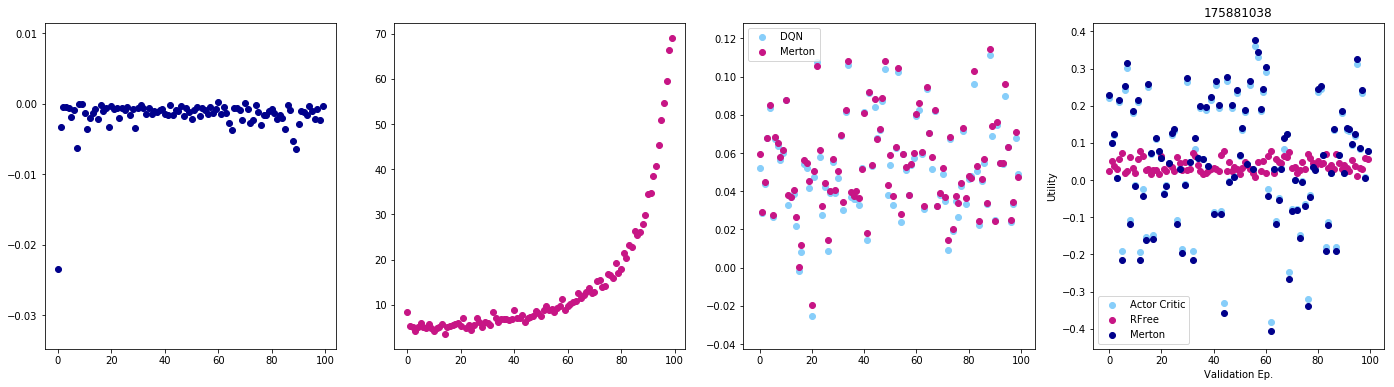


175881038      A2C Mean: 0.0552, Std: 0.1544
175881038Risk Free Mean: 0.0402, Std: 0.0179
175881038   Merton Mean: 0.0554, Std: 0.1632



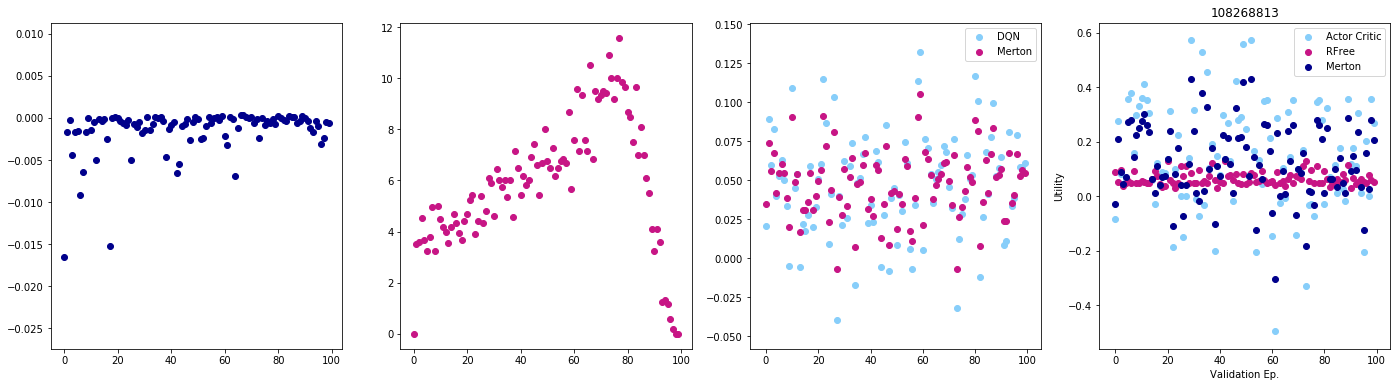


108268813      A2C Mean: 0.1444, Std: 0.1955
108268813Risk Free Mean: 0.0652, Std: 0.0234
108268813   Merton Mean: 0.1251, Std: 0.1336



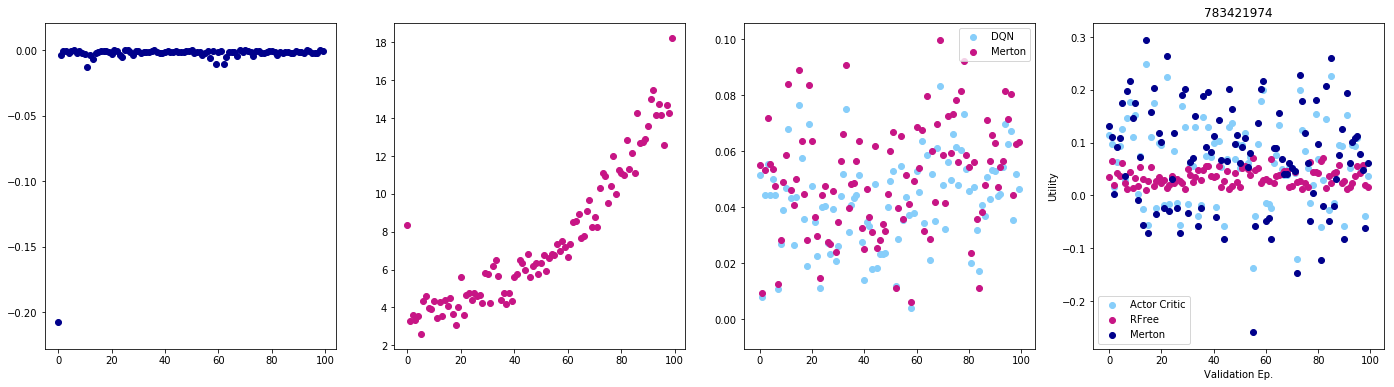


783421974      A2C Mean: 0.0649, Std: 0.0755
783421974Risk Free Mean: 0.035, Std: 0.0155
783421974   Merton Mean: 0.073, Std: 0.1006



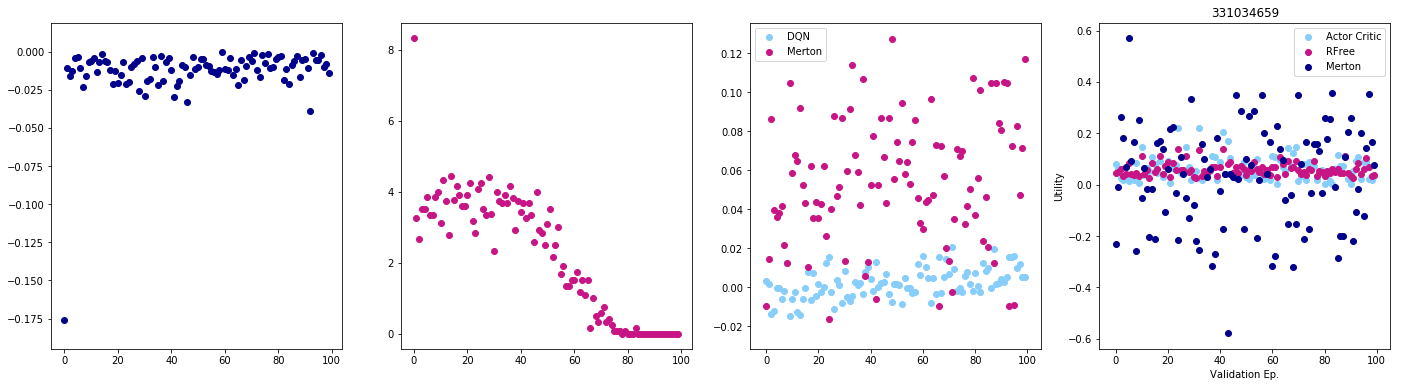


331034659      A2C Mean: 0.0632, Std: 0.0463
331034659Risk Free Mean: 0.0601, Std: 0.0249
331034659   Merton Mean: 0.0321, Std: 0.1993



In [9]:
# %%time

with mp.Pool(mp.cpu_count()) as pool:
    _ = pool.map(Run, np.random.randint(0, int(1e9), 4))